# Import Library

In [1]:
# import drive mount for google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
# save filepath to variable for easier access
path="/content/drive/My Drive/Magister/Holistik/data2.csv"
# import pandas
import pandas as pd
# import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as lines
# import seaborn
import seaborn as sns
# one hot encoder
from sklearn.preprocessing import OneHotEncoder
# oversampling using smote
from imblearn.over_sampling import SMOTE
# splitting dataset, import randomized search
from sklearn.model_selection import train_test_split, RandomizedSearchCV
# random forest
from sklearn.ensemble import RandomForestClassifier
# classification report
from sklearn.metrics import classification_report
# plot tree
from sklearn.tree import plot_tree
# import roc, confusion matrix
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

Mounted at /content/drive


# Data Preparation

In [2]:
# read the data and store data into dataframe
dataframe=pd.read_csv(path)
# print a summary of the data
dataframe.head()

,grade_biologi_odd,kkm_biologi_odd,grade_biologi_even,kkm_biologi_even,grade_fisika_odd,kkm_fisika_odd,grade_fisika_even,kkm_fisika_even,grade_kimia_odd,kkm_kimia_odd,...,grade_bahasa_korea_odd,kkm_bahasa_korea_odd,grade_bahasa_korea_even,kkm_bahasa_korea_even,grade_bahasa_jerman_odd,kkm_bahasa_jerman_odd,grade_bahasa_jerman_even,kkm_bahasa_jerman_even,name,status
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Psikologi,0
1,77,75,93,75,69,75,81,75,78,75,...,0,0,0,0,0,0,0,0,Psikologi,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Psikologi,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Psikologi,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Psikologi,0


In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6779 entries, 0 to 6778
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   grade_biologi_odd            6779 non-null   int64 
 1   kkm_biologi_odd              6779 non-null   int64 
 2   grade_biologi_even           6779 non-null   int64 
 3   kkm_biologi_even             6779 non-null   int64 
 4   grade_fisika_odd             6779 non-null   int64 
 5   kkm_fisika_odd               6779 non-null   int64 
 6   grade_fisika_even            6779 non-null   int64 
 7   kkm_fisika_even              6779 non-null   int64 
 8   grade_kimia_odd              6779 non-null   int64 
 9   kkm_kimia_odd                6779 non-null   int64 
 10  grade_kimia_even             6779 non-null   int64 
 11  kkm_kimia_even               6779 non-null   int64 
 12  grade_sosiologi_odd          6779 non-null   int64 
 13  kkm_sosiologi_odd            6779

In [4]:
dataframe.shape

(6779, 54)

In [5]:
dataframe.isnull().sum()

grade_biologi_odd              0
kkm_biologi_odd                0
grade_biologi_even             0
kkm_biologi_even               0
grade_fisika_odd               0
kkm_fisika_odd                 0
grade_fisika_even              0
kkm_fisika_even                0
grade_kimia_odd                0
kkm_kimia_odd                  0
grade_kimia_even               0
kkm_kimia_even                 0
grade_sosiologi_odd            0
kkm_sosiologi_odd              0
grade_sosiologi_even           0
kkm_sosiologi_even             0
grade_geografi_odd             0
kkm_geografi_odd               0
grade_geografi_even            0
kkm_geografi_even              0
grade_ekonomi_odd              0
kkm_ekonomi_odd                0
grade_ekonomi_even             0
kkm_ekonomi_even               0
grade_matematika_odd           0
kkm_matematika_odd             0
grade_matematika_even          0
kkm_matematika_even            0
grade_bahasa_inggris_odd       0
kkm_bahasa_inggris_odd         0
grade_baha

In [6]:
dataframe.describe()

,grade_biologi_odd,kkm_biologi_odd,grade_biologi_even,kkm_biologi_even,grade_fisika_odd,kkm_fisika_odd,grade_fisika_even,kkm_fisika_even,grade_kimia_odd,kkm_kimia_odd,...,kkm_bahasa_jepang_even,grade_bahasa_korea_odd,kkm_bahasa_korea_odd,grade_bahasa_korea_even,kkm_bahasa_korea_even,grade_bahasa_jerman_odd,kkm_bahasa_jerman_odd,grade_bahasa_jerman_even,kkm_bahasa_jerman_even,status
count,6779.000000,6779.000000,6779.000000,6779.000000,6779.000000,6779.000000,6779.000000,6779.000000,6779.000000,6779.000000,...,6779.000000,6779.0,6779.0,6779.0,6779.0,6779.000000,6779.000000,6779.000000,6779.000000,6779.000000
mean,28.064759,24.445346,28.443576,24.422334,27.799823,24.435610,28.121847,24.426317,27.863992,24.442396,...,0.196342,0.0,0.0,0.0,0.0,0.103703,0.086738,0.101932,0.087771,0.945420
std,39.758148,34.648189,40.329630,34.652411,39.447167,34.633926,39.911076,34.645879,39.490956,34.642520,...,3.810262,0.0,0.0,0.0,0.0,3.021222,2.526315,2.967528,2.555341,0.227176
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
75%,80.000000,70.000000,82.000000,70.000000,80.000000,70.000000,80.000000,70.000000,79.000000,70.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
max,100.000000,86.000000,100.000000,88.000000,100.000000,87.000000,100.000000,87.000000,100.000000,85.000000,...,78.000000,0.0,0.0,0.0,0.0,97.000000,78.000000,91.000000,78.000000,1.000000


# Plotting

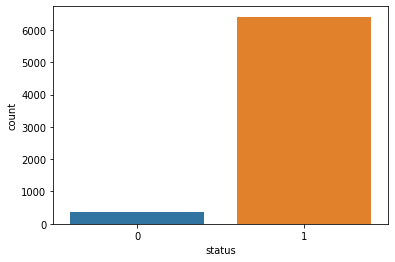

In [7]:
plt.figure(figsize = (6,4))
sns.countplot(x='status', data=dataframe)
plt.show()

# One Hot Encoding

In [8]:
X = dataframe.drop(['status'],axis=1)
X.shape

(6779, 53)

In [9]:
obj = (X.dtypes == 'object')
object_cols_X = list(obj[obj].index)
object_cols_X

['name']

In [10]:
X_copy = X.copy()
X_copy.head()

,grade_biologi_odd,kkm_biologi_odd,grade_biologi_even,kkm_biologi_even,grade_fisika_odd,kkm_fisika_odd,grade_fisika_even,kkm_fisika_even,grade_kimia_odd,kkm_kimia_odd,...,kkm_bahasa_jepang_even,grade_bahasa_korea_odd,kkm_bahasa_korea_odd,grade_bahasa_korea_even,kkm_bahasa_korea_even,grade_bahasa_jerman_odd,kkm_bahasa_jerman_odd,grade_bahasa_jerman_even,kkm_bahasa_jerman_even,name
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Psikologi
1,77,75,93,75,69,75,81,75,78,75,...,0,0,0,0,0,0,0,0,0,Psikologi
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Psikologi
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Psikologi
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Psikologi


In [11]:
OH_encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(X[object_cols_X]))
OH_cols.index = X.index
num_X = X.drop(object_cols_X, axis=1)
OH_X = pd.concat([num_X, OH_cols], axis=1)
OH_X

,grade_biologi_odd,kkm_biologi_odd,grade_biologi_even,kkm_biologi_even,grade_fisika_odd,kkm_fisika_odd,grade_fisika_even,kkm_fisika_even,grade_kimia_odd,kkm_kimia_odd,...,12,13,14,15,16,17,18,19,20,21
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,77,75,93,75,69,75,81,75,78,75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6774,85,76,81,76,80,76,82,76,79,76,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6775,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6776,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6777,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [12]:
import numpy as np
y = dataframe['status'].values[:,np.newaxis]
y.shape

(6779, 1)

# Splitting Data

In [13]:
# split the data into training and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(OH_X, y, test_size=0.2, random_state=42)

# split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (4338, 74)
Number transactions y_train dataset:  (4338, 1)
Number transactions X_test dataset:  (1356, 74)
Number transactions y_test dataset:  (1356, 1)


# Oversampling

In [14]:
smote = SMOTE(random_state=42)
# convert column names to strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)
X_val.columns = X_val.columns.astype(str)
# resampling
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [15]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

After OverSampling, the shape of train_X: (8222, 74)
After OverSampling, the shape of train_y: (8222,) 



In [16]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, counts of label '1': 4111
After OverSampling, counts of label '0': 4111


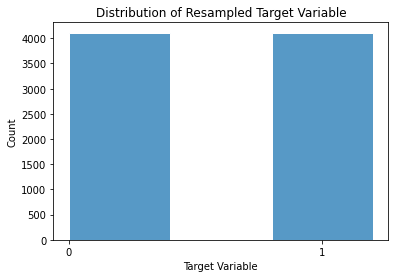

In [17]:
sns.histplot(y_train_res, bins=2, binwidth=0.4, edgecolor='white')
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.xticks([0, 1])
plt.title('Distribution of Resampled Target Variable')
plt.show()

# Random Forest

In [18]:
# create a random forest classifier with default hyperparameters
rf = RandomForestClassifier()

# Random Search

In [19]:
# define the hyperparameters to search over
param_distributions = {'n_estimators': [10, 50, 100, 200],
                       'max_depth': [None, 5, 10, 20],
                       'min_samples_split': [2, 5, 10],
                       'min_samples_leaf': [1, 2, 4]}

In [20]:
# perform randomized search over the hyperparameters
random_search = RandomizedSearchCV(rf, param_distributions, n_iter=10, cv=5)
random_search.fit(X_train_res, y_train_res)

# fit the classifier to the data using the best hyperparameters found by randomized search
rf_best = random_search.best_estimator_
rf_best.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, n_estimators=200)

# Classification Report

In [21]:
# generate predictions for the validation set and print a classification report
y_pred = rf_best.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.16      0.18      0.17        55
           1       0.96      0.95      0.95      1030

    accuracy                           0.91      1085
   macro avg       0.56      0.57      0.56      1085
weighted avg       0.92      0.91      0.91      1085



In [22]:
# make predictions on the testing set and evaluate the performance
y_test_pred = rf_best.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.12      0.10      0.11        88
           1       0.94      0.95      0.94      1268

    accuracy                           0.90      1356
   macro avg       0.53      0.53      0.53      1356
weighted avg       0.89      0.90      0.89      1356



# Plot Tree

[[0.21071712 0.78928288]]


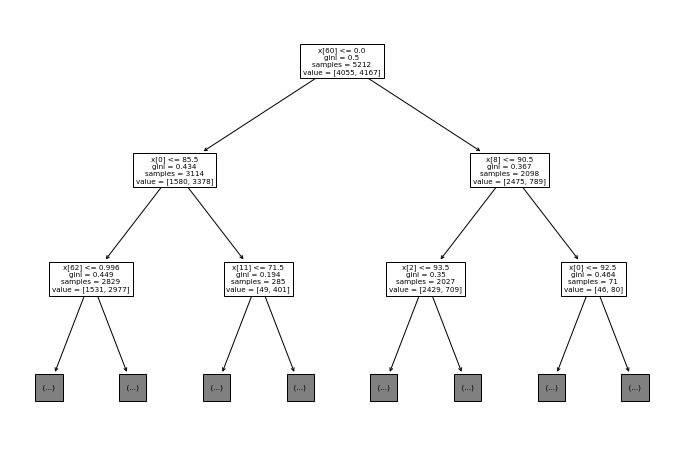

In [23]:
# plot the first decision tree in the random forest
fig, ax = plt.subplots(figsize=(12, 8))
plot_tree(rf_best.estimators_[0], max_depth=2, ax=ax)

# to visualize the probability of each class at each node, use the `predict_proba` method on the entire random forest.
# for example, to predict the probability of each class for the first instance in the test set:
probs = rf_best.predict_proba(X_test[:1])
print(probs)

# ROC

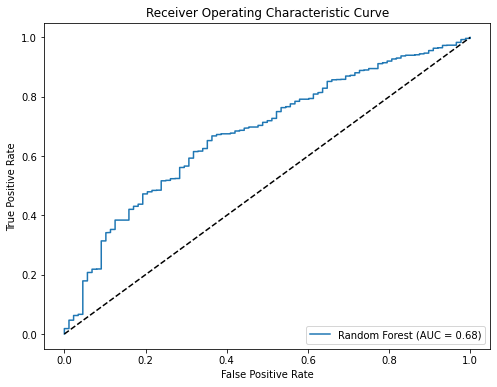

In [24]:
# predict class probabilities for test set
y_pred_proba = rf_best.predict_proba(X_test)[:, 1]
# calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
# plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Random Forest (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')

# Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix')

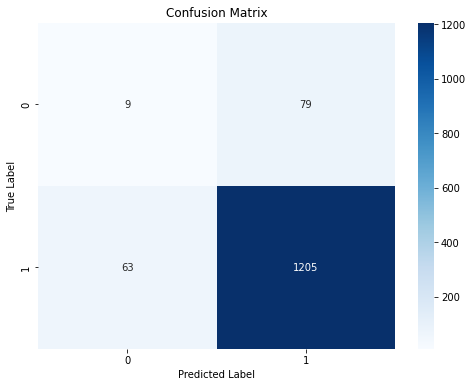

In [25]:
# calculate confusion matrix
y_pred = rf_best.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
# plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')